<a href="https://colab.research.google.com/github/ISTITI89/ISTITI89/blob/main/%5BW7_May22%5D_Lecture_7_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Customer Segmentation**

## Content
- Objective
- Data Gathering
- Code Preparation
- Raw Data Preparation
- Cleaning Data
- EDA
- Cluster Analysis

# **Objective**

**Indoapril** is the largest retail company in Wakanda since 2010 and is the first to integrate retail shopping experience between offline store and online website. With a lot of customer that shop in the Indoapril, Indoapril CMO have a hunch that **their marketing spend is overspending** because they always sent their marketing promotion to all of the customer. 

However, he don't have any confidence on sending the marketing promotion to subgroup of the customer because he feels that if some customer doesn't get the promotion, some customer will be missing the promotion opportunity.

As **CMO Analyst**, we can conclude that the problem is: "*How can Indoapril create a marketing promotion such as that the promotion is maximized in each of the customer*"

One of the solution on this is creating **customer segmentation** so that every marketing effort is maximized and targeted.

# **Data Gathering**

The **data** is provided in google sheet [Customer Data](https://docs.google.com/spreadsheets/d/1yFKrZINbjcp3HrSwfcr5y2UX78k0y5DmUG1yXyJrDS0/edit#gid=0) which consist of **unique customer** that have already bought some item in Indoapril company from 2010 to 2020. The customer data consist of their demographic data and the summary of their transaction in Indoapril. The detail of the data definition can be seen below.

Data Definition:
- ID: Customer’s unique identifier
- Year_Birth: Customer's birth year
- Education: Education Qualification of customer
- Marital_Status: Marital Status of customer
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Recency: Number of days since customer's last purchase
- MntWines: Amount spent on wine
- MntFruits: Amount spent on fruit
- MntMeatProducts: Amount spent on meat
- MntFishProducts: Amount spent on fish
- MntSweetProducts: Amount spent on sweet goods
- MntGoldProds: Amount spent on gold
- NumWebPurchases: number of purchase using website
- NumCatalogPurchases: number of purchase using offline catalog
- NumStorePurchases: number of purchase using offline store
- NumDealsPurchases: number of purchase using deal discount
- NumWebVisitsMonth: number of visit to website
- Complain: customer is complaint or not

# **Code Preparation**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn import cluster

# **Raw Data Preparation**

In [ ]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1yFKrZINbjcp3HrSwfcr5y2UX78k0y5DmUG1yXyJrDS0/edit#gid=0'
sheet_url_trf = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
df = pd.read_csv(sheet_url_trf)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumDealsPurchases,NumWebVisitsMonth,Complain
0,5524,1957,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,88,8,10,4,3,7,0
1,2174,1954,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,6,1,1,2,2,5,0
2,4141,1965,Graduation,Together,71613.0,0,0,26,426,49,127,111,21,42,8,2,10,1,4,0
3,6182,1984,Graduation,Together,26646.0,1,0,26,11,4,20,10,3,5,2,0,4,2,6,0
4,5324,1981,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,5,3,6,5,5,0


check data type

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Recency              2240 non-null   int64  
 8   MntWines             2240 non-null   int64  
 9   MntFruits            2240 non-null   int64  
 10  MntMeatProducts      2240 non-null   int64  
 11  MntFishProducts      2240 non-null   int64  
 12  MntSweetProducts     2240 non-null   int64  
 13  MntGoldProds         2240 non-null   int64  
 14  NumWebPurchases      2240 non-null   int64  
 15  NumCatalogPurchases  2240 non-null   i

all data type are normal

First, change the Year_Birth to Age

In [ ]:
df['Age'] = 2022-df['Year_Birth']
df.drop('Year_Birth',axis=1,inplace=True)
df.head()

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumDealsPurchases,NumWebVisitsMonth,Complain,Age
0,5524,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,88,8,10,4,3,7,0,65
1,2174,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,6,1,1,2,2,5,0,68
2,4141,Graduation,Together,71613.0,0,0,26,426,49,127,111,21,42,8,2,10,1,4,0,57
3,6182,Graduation,Together,26646.0,1,0,26,11,4,20,10,3,5,2,0,4,2,6,0,38
4,5324,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,5,3,6,5,5,0,41


Second, let's combine all amount spent and all purchases so we don't use a lot of variable

In [ ]:
df['Amount Spent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] 
+ df['MntFishProducts'] + df['MntSweetProducts']
+ df['MntGoldProds']
df['Total Purchase'] = df['NumWebPurchases'] + df['NumCatalogPurchases']
+ df['NumStorePurchases'] + df['NumDealsPurchases']

df.drop(['MntWines','MntFruits','MntMeatProducts','MntFishProducts',
         'MntSweetProducts','MntGoldProds','NumWebPurchases',
         'NumCatalogPurchases','NumStorePurchases',
         'NumDealsPurchases'],axis=1,inplace=True)

and combine Kidhome & Teenhome to Number_Child

In [ ]:
df["Children"]=df["Kidhome"]+df["Teenhome"]

df.drop(["Kidhome",'Teenhome'],axis=1,inplace=True)

In [ ]:
df.head()

,ID,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Age,Amount Spent,Total Purchase,Children
0,5524,Graduation,Single,58138.0,58,7,0,65,1269,18,0
1,2174,Graduation,Single,46344.0,38,5,0,68,18,2,2
2,4141,Graduation,Together,71613.0,26,4,0,57,602,10,0
3,6182,Graduation,Together,26646.0,26,6,0,38,35,2,1
4,5324,PhD,Married,58293.0,94,5,0,41,334,8,1


# **Cleaning Data**

Cleaning Data:
- missing data
- typos
- duplicates
- outlier
- ~~string manipulation~~
- ~~timeseries manipulation~~
- ~~combining dataset~~

## missing data

In [ ]:
df.info()
# df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 2240 non-null   int64  
 1   Education          2240 non-null   object 
 2   Marital_Status     2240 non-null   object 
 3   Income             2216 non-null   float64
 4   Recency            2240 non-null   int64  
 5   NumWebVisitsMonth  2240 non-null   int64  
 6   Complain           2240 non-null   int64  
 7   Age                2240 non-null   int64  
 8   Amount Spent       2240 non-null   int64  
 9   Total Purchase     2240 non-null   int64  
 10  Children           2240 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 192.6+ KB


there are null data in income column (24 row / 1% of total) >> let's just delete it

In [ ]:
df.dropna(inplace=True)

let's check the data again

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 2216 non-null   int64  
 1   Education          2216 non-null   object 
 2   Marital_Status     2216 non-null   object 
 3   Income             2216 non-null   float64
 4   Recency            2216 non-null   int64  
 5   NumWebVisitsMonth  2216 non-null   int64  
 6   Complain           2216 non-null   int64  
 7   Age                2216 non-null   int64  
 8   Amount Spent       2216 non-null   int64  
 9   Total Purchase     2216 non-null   int64  
 10  Children           2216 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 207.8+ KB


## typos

In [ ]:
df.columns

Index(['ID', 'Education', 'Marital_Status', 'Income', 'Recency',
       'NumWebVisitsMonth', 'Complain', 'Age', 'Amount Spent',
       'Total Purchase', 'Children'],
      dtype='object')

In [ ]:
for i in df.columns:
  print(i)
  unique_data = df[i].value_counts()
  print(unique_data,'\n')

ID
5524    1
6885    1
3478    1
7494    1
1763    1
       ..
7235    1
3560    1
5278    1
7761    1
9405    1
Name: ID, Length: 2216, dtype: int64 

Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64 

Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64 

Income
7500.0     12
35860.0     4
37760.0     3
83844.0     3
63841.0     3
           ..
40760.0     1
41452.0     1
6835.0      1
33622.0     1
52869.0     1
Name: Income, Length: 1974, dtype: int64 

Recency
56    37
30    32
54    32
46    31
92    30
      ..
41    15
59    14
22    13
7     12
44    11
Name: Recency, Length: 100, dtype: int64 

NumWebVisitsMonth
7     387
8     340
6     335
5     279
4     217
3     203
2     201
1     150
9      82
0      10
20      3
10      3
14      2
19      2
17      1
13      1

summary:
- marital status Alone, YOLO, Absurb is useless >> let's just delete it
- complain column is useless (only 21 row have complain) >> let's just drop it

In [ ]:
#df[df['columna']>5 ]

In [ ]:
df = df[~df['Marital_Status'].isin(['Alone','YOLO','Absurb'])]

In [ ]:
df.drop('Complain',axis=1,inplace=True)

In [ ]:
df

,ID,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Age,Amount Spent,Total Purchase,Children
0,5524,Graduation,Single,58138.0,58,7,65,1269,18,0
1,2174,Graduation,Single,46344.0,38,5,68,18,2,2
2,4141,Graduation,Together,71613.0,26,4,57,602,10,0
3,6182,Graduation,Together,26646.0,26,6,38,35,2,1
4,5324,PhD,Married,58293.0,94,5,41,334,8,1
...,...,...,...,...,...,...,...,...,...,...
2235,10870,Graduation,Married,61223.0,46,5,55,934,12,1
2236,4001,PhD,Together,64014.0,56,7,76,436,10,3
2237,7270,Graduation,Divorced,56981.0,91,6,41,1173,5,0
2238,8235,Master,Together,69245.0,8,3,66,672,11,1


In [ ]:
df.describe()

,ID,Income,Recency,NumWebVisitsMonth,Age,Amount Spent,Total Purchase,Children
count,2211.000000,2211.000000,2211.000000,2211.000000,2211.000000,2211.000000,2211.000000,2211.000000
mean,5592.031208,52262.179104,49.079602,5.315242,50.710991,498.939846,6.756671,0.946178
std,3244.845070,25195.187001,28.935706,2.426035,117.098548,521.843911,4.722867,0.749236
min,0.000000,1730.000000,0.000000,0.000000,-5424.000000,0.000000,0.000000,0.000000
25%,2827.500000,35284.000000,24.000000,3.000000,45.000000,43.000000,2.000000,0.000000
50%,5462.000000,51411.000000,49.000000,6.000000,52.000000,296.000000,6.000000,1.000000
75%,8423.500000,68641.000000,74.000000,7.000000,63.000000,855.000000,10.000000,1.000000
max,11191.000000,666666.000000,99.000000,20.000000,129.000000,2246.000000,28.000000,3.000000


Also, we need to check if there are some un-logical number such as have amount spent zero but have total purchase and vice versa

In [ ]:
filter_amount = df['Amount Spent']==0
filter_purchase = df['Total Purchase']==0
print(df[filter_amount|filter_purchase])

         ID   Education Marital_Status    Income  Recency  NumWebVisitsMonth  \
42     8430  Graduation       Together   21994.0        4                  5   
78    10401    2n Cycle       Together   26326.0       12                  3   
157    9283  Graduation         Single   60199.0       49                  4   
178   10492  Graduation       Together   38285.0       96                  2   
294   10451  Graduation       Together   29672.0        6                  6   
381    9543  Graduation        Married   19986.0       74                  7   
442    5029  Graduation        Married   18100.0       14                  5   
617    1503         PhD       Together  162397.0       31                  1   
655    5555  Graduation       Divorced  153924.0       81                  0   
661    7093  Graduation        Married   19986.0       74                  7   
730    5329         PhD       Divorced   35946.0       24                  5   
774    4303         PhD       Together  

There are 37 row that have un-logical data, so let's delete it.

In [ ]:
df = df[~(filter_amount|filter_purchase)] 
#df[~( (df['Amount Spent']==0) | (df['Total Purchase']==0))]
# amount spent > 0
# total purchase > 0
#simplify -> amount spent tidak 0 total purchase tidak 0 

In [ ]:
df = df[df['Age']>0]

In [ ]:
df.describe()

,ID,Income,Recency,NumWebVisitsMonth,Age,Amount Spent,Total Purchase,Children
count,2173.000000,2173.000000,2173.000000,2173.000000,2173.000000,2173.000000,2173.000000,2173.000000
mean,5560.227335,52516.901058,49.176254,5.298665,53.178095,507.085596,6.869765,0.943396
std,3242.110249,24837.998108,28.910237,2.360195,11.990598,522.520683,4.680400,0.743925
min,0.000000,2447.000000,0.000000,0.000000,26.000000,1.000000,1.000000,0.000000
25%,2804.000000,35765.000000,24.000000,3.000000,45.000000,46.000000,3.000000,0.000000
50%,5407.000000,51948.000000,50.000000,6.000000,52.000000,310.000000,6.000000,1.000000
75%,8387.000000,68695.000000,74.000000,7.000000,63.000000,870.000000,10.000000,1.000000
max,11191.000000,666666.000000,99.000000,20.000000,129.000000,2246.000000,28.000000,3.000000


## duplicates

In [ ]:
df[df.duplicated()]

,ID,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Age,Amount Spent,Total Purchase,Children


## outlier

In [ ]:
df.columns

Index(['ID', 'Education', 'Marital_Status', 'Income', 'Recency',
       'NumWebVisitsMonth', 'Age', 'Amount Spent', 'Total Purchase',
       'Children'],
      dtype='object')

i= 0 el Income
i= 1 el Recency
i= 2 el NumWebVisitsMonth
i= 3 el Age
i= 4 el Amount Spent
i= 5 el Total Purchase
i= 6 el Children


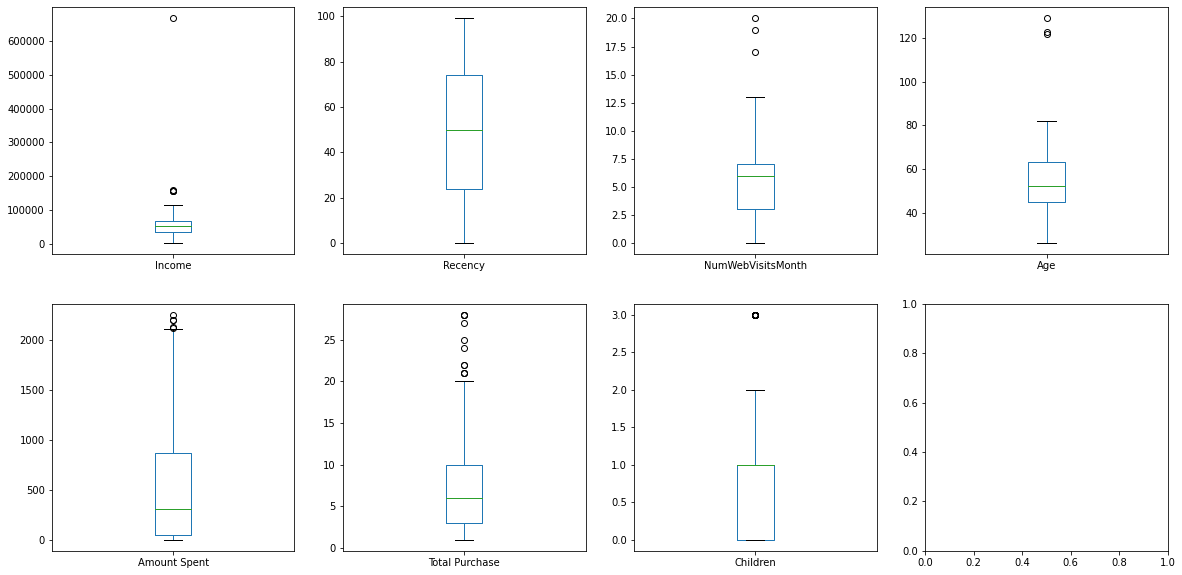

In [ ]:
numerical_column = ['Income', 'Recency',
       'NumWebVisitsMonth', 'Age', 'Amount Spent', 'Total Purchase',
       'Children']

fig, axes = plt.subplots(nrows=2, ncols=4,figsize=(20,10))
for i,el in enumerate(numerical_column):
    print('i=',i,'el',el)
    a = df.boxplot(el, ax=axes.flatten()[i],grid=False)
plt.show()

let's only delete the biggest outlier in: income, age, children

biggest = far away from Max

assume the smaller outlier is noise

In [ ]:
df = df[(df['Income']<600000)]
df = df[(df['Age']<90)]
df = df[(df['Children']<2.5)]
df

,ID,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Age,Amount Spent,Total Purchase,Children
0,5524,Graduation,Single,58138.0,58,7,65,1269,18,0
1,2174,Graduation,Single,46344.0,38,5,68,18,2,2
2,4141,Graduation,Together,71613.0,26,4,57,602,10,0
3,6182,Graduation,Together,26646.0,26,6,38,35,2,1
4,5324,PhD,Married,58293.0,94,5,41,334,8,1
...,...,...,...,...,...,...,...,...,...,...
2234,8372,Graduation,Married,34421.0,81,7,48,13,1,1
2235,10870,Graduation,Married,61223.0,46,5,55,934,12,1
2237,7270,Graduation,Divorced,56981.0,91,6,41,1173,5,0
2238,8235,Master,Together,69245.0,8,3,66,672,11,1


i= 0 el Income
i= 1 el Recency
i= 2 el NumWebVisitsMonth
i= 3 el Age
i= 4 el Amount Spent
i= 5 el Total Purchase
i= 6 el Children


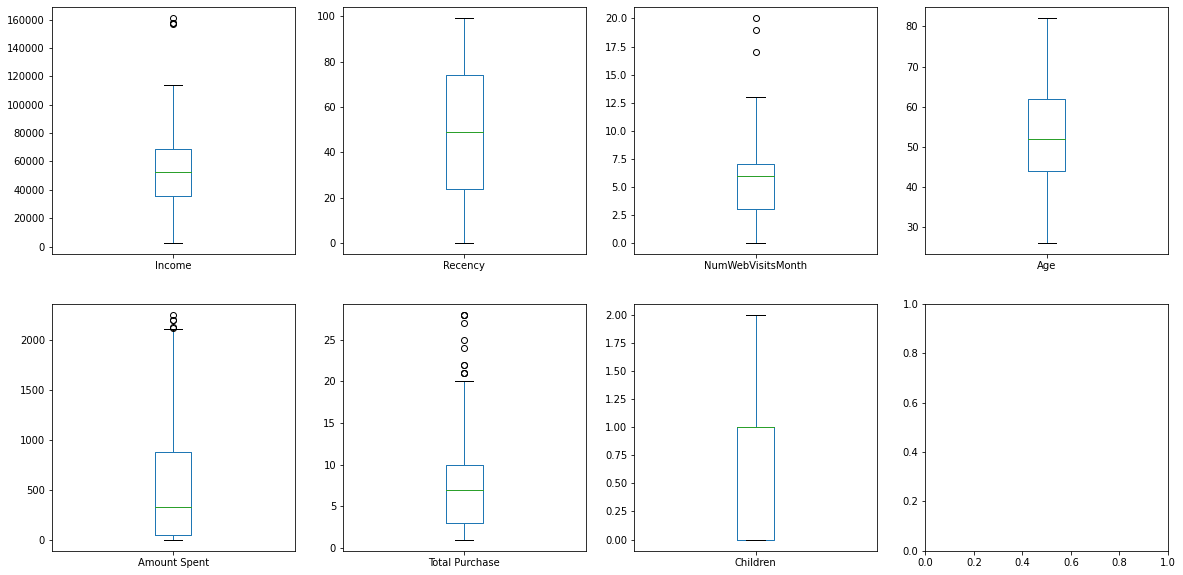

In [ ]:
numerical_column = ['Income', 'Recency',
       'NumWebVisitsMonth', 'Age', 'Amount Spent', 'Total Purchase',
       'Children']

fig, axes = plt.subplots(nrows=2, ncols=4,figsize=(20,10))
for i,el in enumerate(numerical_column):
    print('i=',i,'el',el)
    a = df.boxplot(el, ax=axes.flatten()[i],grid=False)
plt.show()

# **EDA**

Exploring Data:
- summary data overview
- categorical encoding
- standardize the data

First, let's see the summary of the clean dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2123 entries, 0 to 2239
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 2123 non-null   int64  
 1   Education          2123 non-null   object 
 2   Marital_Status     2123 non-null   object 
 3   Income             2123 non-null   float64
 4   Recency            2123 non-null   int64  
 5   NumWebVisitsMonth  2123 non-null   int64  
 6   Age                2123 non-null   int64  
 7   Amount Spent       2123 non-null   int64  
 8   Total Purchase     2123 non-null   int64  
 9   Children           2123 non-null   int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 182.4+ KB


In [ ]:
df[numerical_column].describe()

,Income,Recency,NumWebVisitsMonth,Age,Amount Spent,Total Purchase,Children
count,2123.000000,2123.000000,2123.00000,2123.000000,2123.000000,2123.000000,2123.000000
mean,52340.325954,49.062176,5.27414,52.945360,512.981159,6.933114,0.899199
std,21147.036881,28.837677,2.36974,11.722355,523.468039,4.688833,0.687312
min,2447.000000,0.000000,0.00000,26.000000,1.000000,1.000000,0.000000
25%,35776.500000,24.000000,3.00000,44.000000,47.500000,3.000000,0.000000
50%,52190.000000,49.000000,6.00000,52.000000,322.000000,7.000000,1.000000
75%,69090.000000,74.000000,7.00000,62.000000,874.000000,10.000000,1.000000
max,160803.000000,99.000000,20.00000,82.000000,2246.000000,28.000000,2.000000


In [ ]:
df[['Education', 'Marital_Status']].describe()

,Education,Marital_Status
count,2123,2123
unique,5,6
top,Graduation,Married
freq,1074,827


In [ ]:
df.corr()

,ID,Income,Recency,NumWebVisitsMonth,Age,Amount Spent,Total Purchase,Children
ID,1.000000,0.014297,-0.048242,-0.014146,-0.006217,-0.002913,0.006092,0.004656
Income,0.014297,1.000000,-0.003420,-0.658571,0.209280,0.800793,0.716653,-0.380501
Recency,-0.048242,-0.003420,1.000000,-0.021386,0.020447,0.013599,0.006294,0.004572
NumWebVisitsMonth,-0.014146,-0.658571,-0.021386,1.000000,-0.136618,-0.487288,-0.363983,0.447503
Age,-0.006217,0.209280,0.020447,-0.136618,1.000000,0.130783,0.184811,0.066054
Amount Spent,-0.002913,0.800793,0.013599,-0.487288,0.130783,1.000000,0.766693,-0.500829
Total Purchase,0.006092,0.716653,0.006294,-0.363983,0.184811,0.766693,1.000000,-0.368837
Children,0.004656,-0.380501,0.004572,0.447503,0.066054,-0.500829,-0.368837,1.000000


Data Overview:
- There are **2.124** user in the clean dataset
- Mean income of Indoapril user is **52.345** with median age **51 years old**
- Most of the user have only **1 child** with maximum child is 2
- Most of the user is **graduate people** and have been **married**

Let's copy the dataframe so the original number still be in the dataframe

In [ ]:
df_cluster = df.copy()

As the Clustering method need to use numbers, let's change categorical column to to number which Education column will be using label encoding (ordinal) & Marital_Status will be using one-hot encoding

In [ ]:
df_cluster['Education'] = df_cluster['Education'].astype('category')
df_cluster['Education_Category'] = df_cluster['Education'].cat.codes

In [ ]:
dum_df = pd.get_dummies(df_cluster, columns=["Marital_Status"], prefix=["Marital_Status"])
df_cluster = df_cluster.merge(dum_df)
df_cluster

,ID,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Age,Amount Spent,Total Purchase,Children,Education_Category,Marital_Status_Absurd,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,5524,Graduation,Single,58138.0,58,7,65,1269,18,0,2,0,0,0,1,0,0
1,2174,Graduation,Single,46344.0,38,5,68,18,2,2,2,0,0,0,1,0,0
2,4141,Graduation,Together,71613.0,26,4,57,602,10,0,2,0,0,0,0,1,0
3,6182,Graduation,Together,26646.0,26,6,38,35,2,1,2,0,0,0,0,1,0
4,5324,PhD,Married,58293.0,94,5,41,334,8,1,4,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2118,8372,Graduation,Married,34421.0,81,7,48,13,1,1,2,0,0,1,0,0,0
2119,10870,Graduation,Married,61223.0,46,5,55,934,12,1,2,0,0,1,0,0,0
2120,7270,Graduation,Divorced,56981.0,91,6,41,1173,5,0,2,0,1,0,0,0,0
2121,8235,Master,Together,69245.0,8,3,66,672,11,1,3,0,0,0,0,1,0


Because the numeric column have different scale, we need to scale it so all numeric feature have diference importance

In [ ]:
scaler = MinMaxScaler()
df_cluster[numerical_column] = scaler.fit_transform(df_cluster[numerical_column])
df_cluster

,ID,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Age,Amount Spent,Total Purchase,Children,Education_Category,Marital_Status_Absurd,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,5524,Graduation,Single,0.351682,0.585859,0.35,0.696429,0.564811,0.629630,0.0,2,0,0,0,1,0,0
1,2174,Graduation,Single,0.277205,0.383838,0.25,0.750000,0.007572,0.037037,1.0,2,0,0,0,1,0,0
2,4141,Graduation,Together,0.436775,0.262626,0.20,0.553571,0.267706,0.333333,0.0,2,0,0,0,0,1,0
3,6182,Graduation,Together,0.152814,0.262626,0.30,0.214286,0.015145,0.037037,0.5,2,0,0,0,0,1,0
4,5324,PhD,Married,0.352661,0.949495,0.25,0.267857,0.148330,0.259259,0.5,4,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2118,8372,Graduation,Married,0.201912,0.818182,0.35,0.392857,0.005345,0.000000,0.5,2,0,0,1,0,0,0
2119,10870,Graduation,Married,0.371164,0.464646,0.25,0.517857,0.415590,0.407407,0.5,2,0,0,1,0,0,0
2120,7270,Graduation,Divorced,0.344376,0.919192,0.30,0.267857,0.522049,0.148148,0.0,2,0,1,0,0,0,0
2121,8235,Master,Together,0.421822,0.080808,0.15,0.714286,0.298886,0.370370,0.5,3,0,0,0,0,1,0


# **Cluster Analysis**

Cluster Analysis:
  - determine cluster number
    - elbow method
    - silhoutte analysis
  - create cluster
  - check agg for each cluster
  - naming

Let's drop the column that are not needed first

In [ ]:
df_cluster = df_cluster.drop(['ID','Marital_Status','Education'],axis=1)

In [ ]:
df_cluster.columns

Index(['Income', 'Recency', 'NumWebVisitsMonth', 'Age', 'Amount Spent',
       'Total Purchase', 'Children', 'Education_Category',
       'Marital_Status_Absurd', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Widow'],
      dtype='object')

In [ ]:
df_cluster = df_cluster[['Income', 'Recency', 'NumWebVisitsMonth', 'Age', 'Amount Spent',
       'Total Purchase', 'Children']]

Let's create a cluster range that make sense for business which from 2 to 10

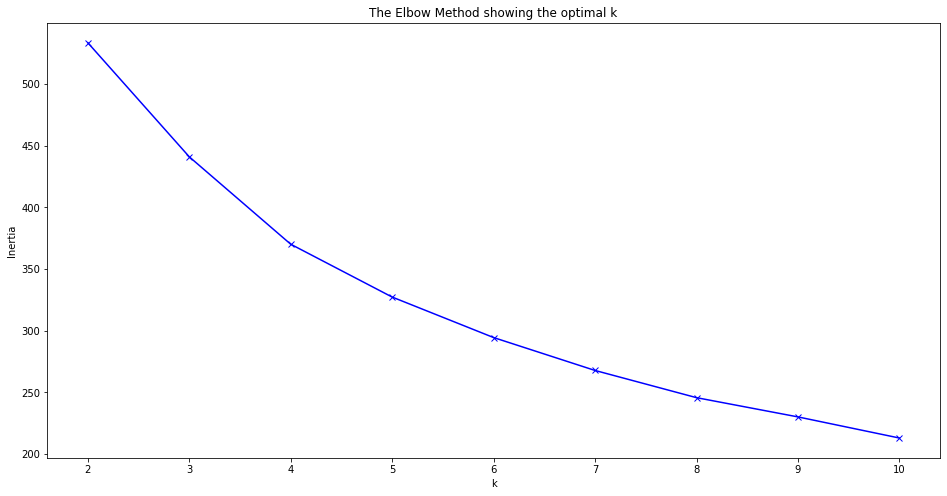

In [ ]:
distortions = []
K = range(2,11)
for k in K:
    kmeanModel = cluster.KMeans(n_clusters=k)
    kmeanModel.fit(df_cluster)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
def silhoutte_analysis(data,cluster=[2,3,4]):
    X = data.to_numpy()

    range_n_clusters = cluster

    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print(
            "For n_clusters =",
            n_clusters,
            "The average silhouette_score is :",
            silhouette_avg,
        )

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(
            X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
        )

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(
            centers[:, 0],
            centers[:, 1],
            marker="o",
            c="white",
            alpha=1,
            s=200,
            edgecolor="k",
        )

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(
            "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
            % n_clusters,
            fontsize=14,
            fontweight="bold",
        )

    plt.show()

For n_clusters = 2 The average silhouette_score is : 0.2796529299422957
For n_clusters = 3 The average silhouette_score is : 0.23659101077572242
For n_clusters = 4 The average silhouette_score is : 0.2571829022812434
For n_clusters = 5 The average silhouette_score is : 0.2568876861345434
For n_clusters = 6 The average silhouette_score is : 0.26269321337023965
For n_clusters = 7 The average silhouette_score is : 0.2574850830881601
For n_clusters = 8 The average silhouette_score is : 0.2616008856196899
For n_clusters = 9 The average silhouette_score is : 0.2681887098901594
For n_clusters = 10 The average silhouette_score is : 0.26732025838713847


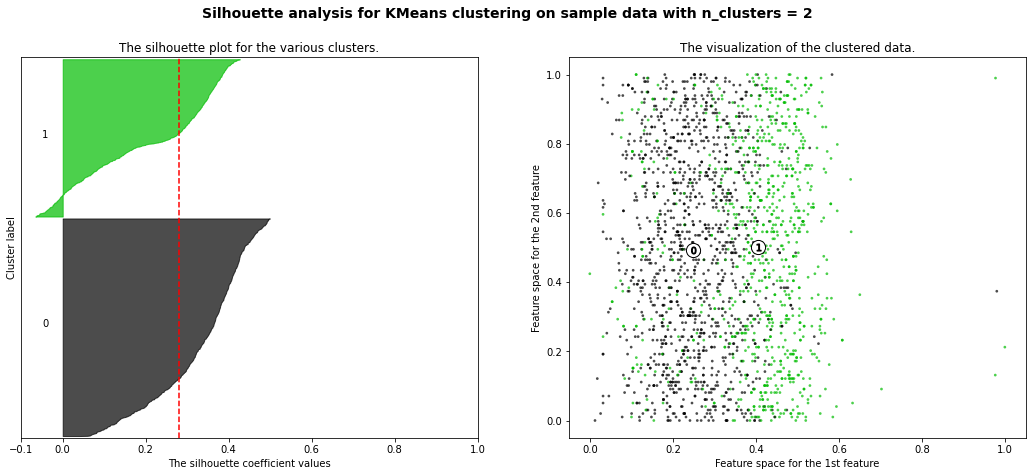

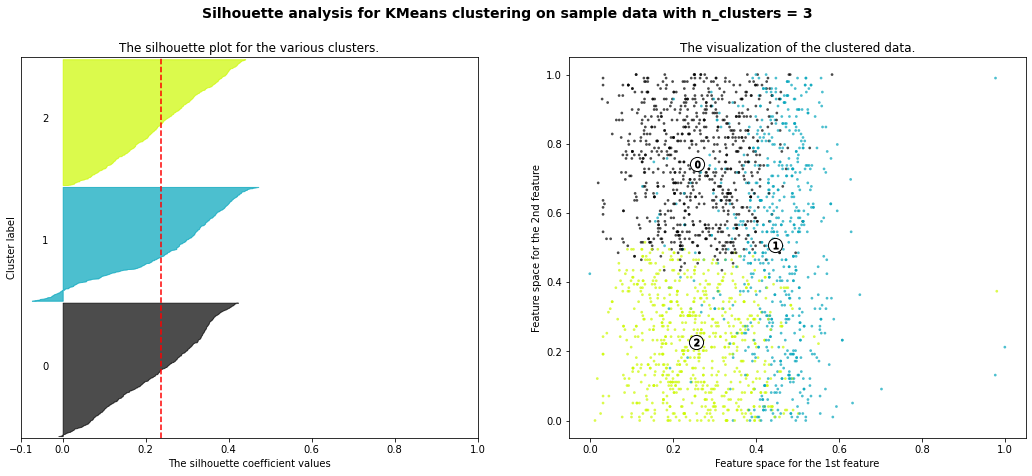

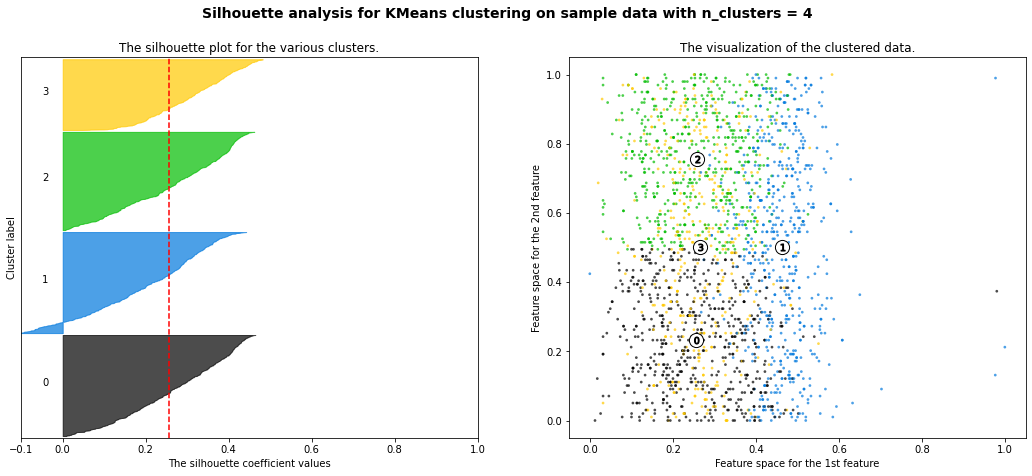

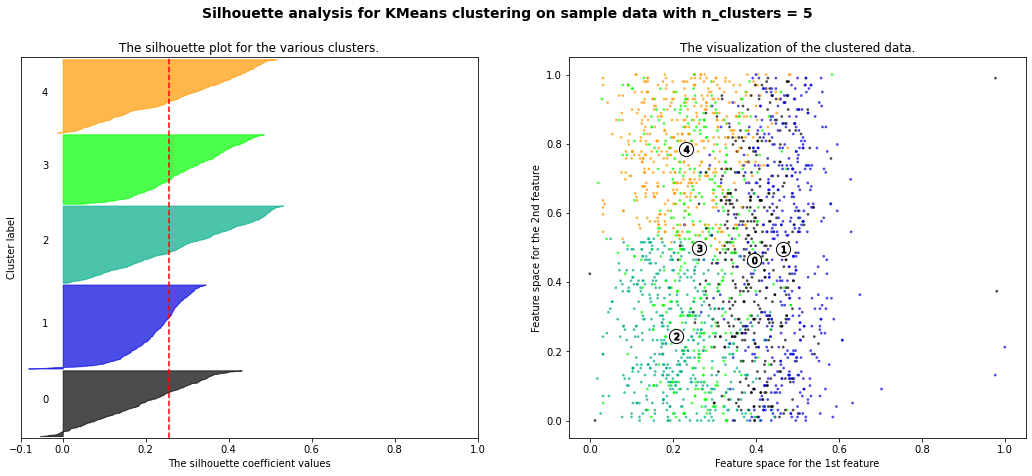

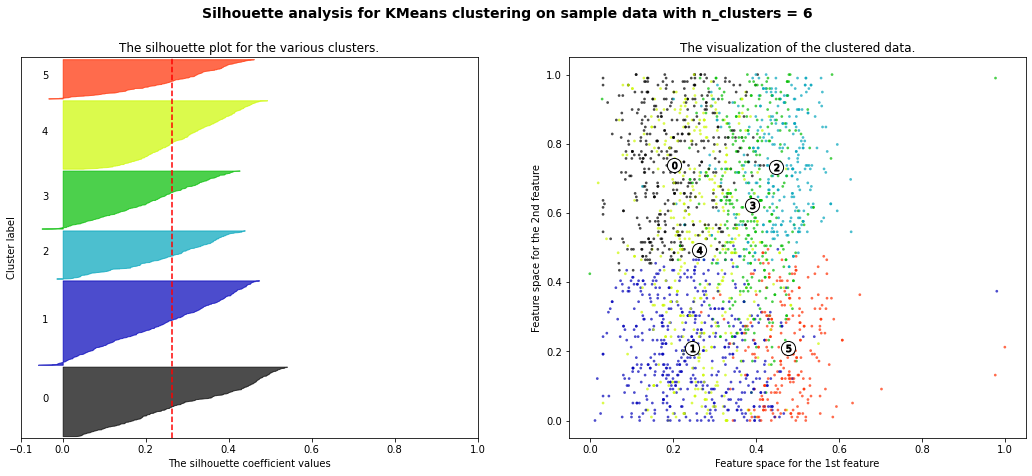

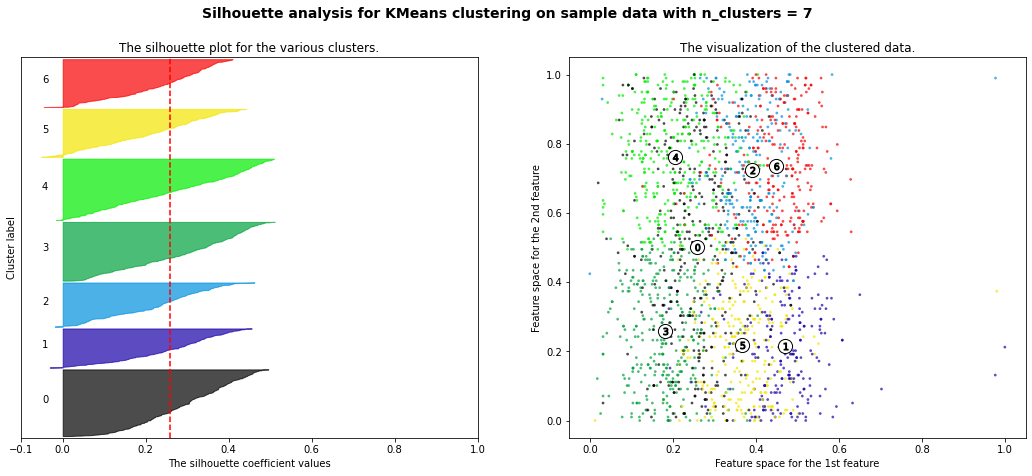

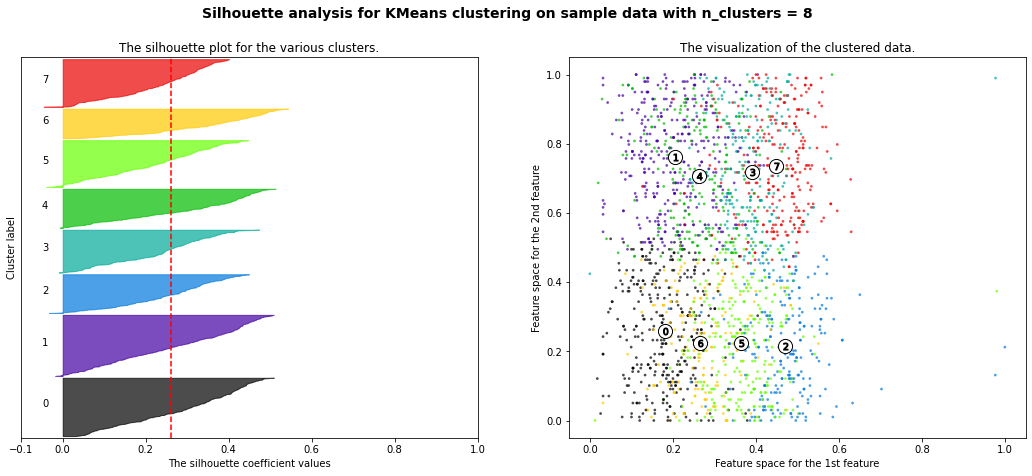

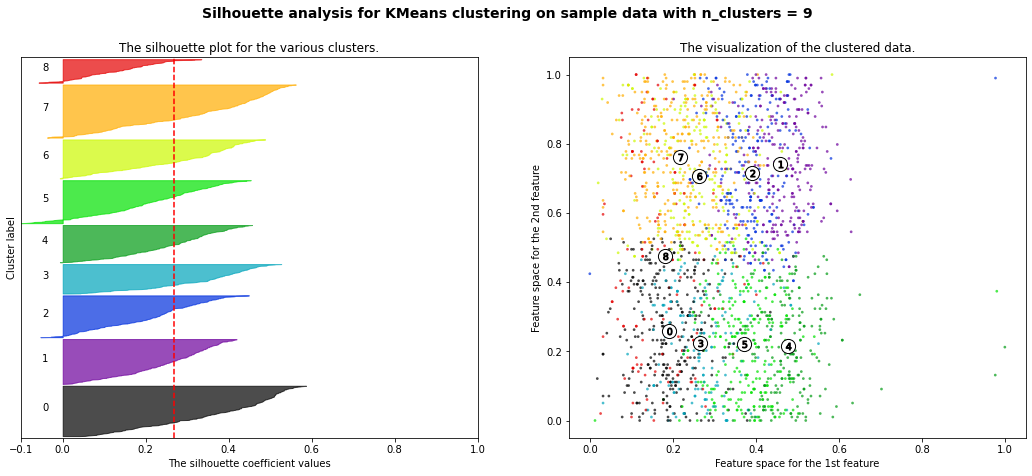

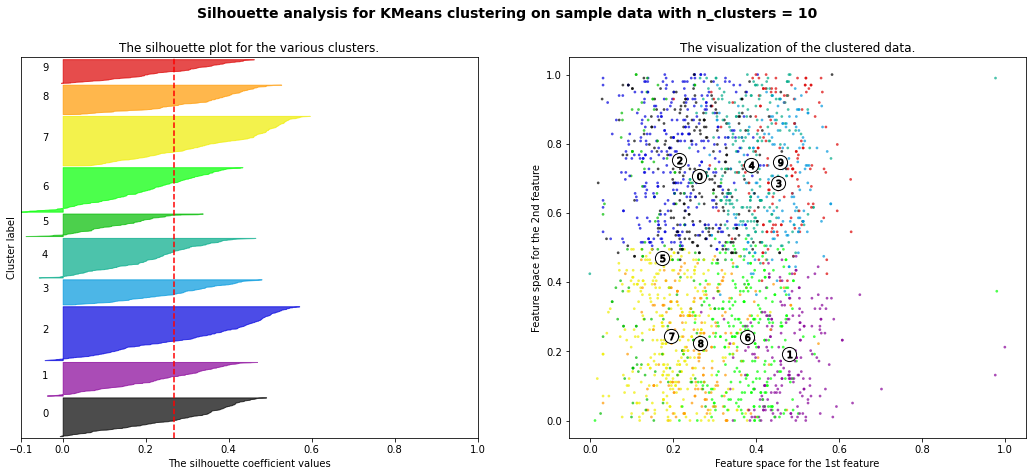

In [ ]:
#from silhoutte import silhoutte_analysis
silhoutte_analysis(df_cluster,list(range(2,11)))

based on elbow method and silhoutte analysis above, we can choose cluster = 6

In [ ]:
cluster_model = cluster.KMeans(n_clusters=6)
cluster_model.fit(df_cluster)
cluster_label = cluster_model.labels_
df['cluster'] = cluster_label
df

,ID,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Age,Amount Spent,Total Purchase,Children,cluster
0,5524,Graduation,Single,58138.0,58,7,65,1269,18,0,4
1,2174,Graduation,Single,46344.0,38,5,68,18,2,2,3
2,4141,Graduation,Together,71613.0,26,4,57,602,10,0,2
3,6182,Graduation,Together,26646.0,26,6,38,35,2,1,1
4,5324,PhD,Married,58293.0,94,5,41,334,8,1,5
...,...,...,...,...,...,...,...,...,...,...,...
2234,8372,Graduation,Married,34421.0,81,7,48,13,1,1,5
2235,10870,Graduation,Married,61223.0,46,5,55,934,12,1,0
2237,7270,Graduation,Divorced,56981.0,91,6,41,1173,5,0,4
2238,8235,Master,Together,69245.0,8,3,66,672,11,1,1


In [ ]:
df.columns

Index(['ID', 'Education', 'Marital_Status', 'Income', 'Recency',
       'NumWebVisitsMonth', 'Age', 'Amount Spent', 'Total Purchase',
       'Children', 'cluster'],
      dtype='object')

In [ ]:
df.groupby(['cluster'])['Income',
 'Recency',
       'NumWebVisitsMonth', 'Age', 'Amount Spent', 'Total Purchase',
       'Children'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Income,Recency,NumWebVisitsMonth,Age,Amount Spent,Total Purchase,Children
cluster,,,,,,,
0,64153.014925,61.537313,5.313433,58.008955,865.262687,11.379104,1.029851
1,41585.601643,20.698152,6.086242,49.710472,228.316222,4.938398,0.864476
2,77920.339207,20.792952,2.801762,52.515419,1204.911894,11.400881,0.039648
3,43945.658228,48.789873,6.324051,56.253165,185.951899,4.205063,2.000000
4,73549.920863,72.647482,2.651079,55.766187,1078.636691,10.489209,0.000000
5,34617.790524,73.007481,6.438903,47.673317,102.690773,3.334165,0.857855


cluster 0 = income agak tinggi, not fresh customer, lumayan sering visit web, lumayan tinggi amount spent, total purchase tinggi, punya anak at least 1. banyak janda/duda -> single parent with kids have much free time and harta gono gini

cluster 2 = high income, high spent, high total purchase, almost no children -> low visit web, general education -> your sultan customer

cluster 5 = lowest income, highest recency, active online, youngest, lowest spent, lowest purchase, most of them have children -> new starting family / mid class guy

# check education

In [ ]:
tmp1 = df.groupby(['cluster','Education'], as_index=False)['ID'].nunique()
tmp2 = df.groupby(['cluster'], as_index=False)['ID'].nunique()

tmp = pd.merge(tmp1, tmp2, on ='cluster')
tmp['%'] = tmp['ID_x']/tmp['ID_y']
tmp.head()

,cluster,Education,ID_x,ID_y,%
0,0,2n Cycle,16,335,0.047761
1,0,Graduation,177,335,0.528358
2,0,Master,48,335,0.143284
3,0,PhD,94,335,0.280597
4,1,2n Cycle,55,487,0.112936


In [ ]:
tmp[tmp['Education'] == 'Basic']

,cluster,Education,ID_x,ID_y,%
5,1,Basic,22,487,0.045175
14,3,Basic,2,395,0.005063
19,4,Basic,1,278,0.003597
24,5,Basic,28,401,0.069825


# check marriage

In [ ]:
tmp1 = df.groupby(['cluster','Marital_Status'], as_index=False)['ID'].nunique()
tmp2 = df.groupby(['cluster'], as_index=False)['ID'].nunique()

tmp = pd.merge(tmp1, tmp2, on ='cluster')
tmp['%'] = tmp['ID_x']/tmp['ID_y']
tmp.head()

,cluster,Marital_Status,ID_x,ID_y,%
0,0,Divorced,47,335,0.140299
1,0,Married,137,335,0.408955
2,0,Single,48,335,0.143284
3,0,Together,87,335,0.259701
4,0,Widow,16,335,0.047761


In [ ]:
tmp[tmp['Marital_Status'] == 'Widow']

,cluster,Marital_Status,ID_x,ID_y,%
4,0,Widow,16,335,0.047761
9,1,Widow,15,487,0.030801
14,2,Widow,7,227,0.030837
19,3,Widow,16,395,0.040506
25,4,Widow,14,278,0.050360
30,5,Widow,8,401,0.019950


In [ ]:
df.groupby(['cluster','Education'], as_index=False)['Amount Spent'].agg(['count','mean','median','max','min'])

count         mean  median   max  min
cluster Education                                        
0       2n Cycle       16   742.312500   662.0  1497  337
        Graduation    177   867.994350   786.0  1817  218
        Master         48   819.437500   750.0  1819  296
        PhD            94   904.446809   910.0  1718  118
1       2n Cycle       55   192.818182    50.0   881   12
        Basic          22    20.909091    20.0    73    1
        Graduation    235   229.051064   115.0  1155    8
        Master         87   256.540230   150.0  1135   11
        PhD            88   272.488636   195.5  1164   11
2       2n Cycle       23  1031.434783  1011.0  1834  454
        Graduation    115  1161.739130  1155.0  2124  239
        Master         38  1386.026316  1387.5  2191  565
        PhD            51  1245.549020  1280.0  2043   11
3       2n Cycle       31   128.645161    36.0   815    8
        Basic           2    18.500000    18.5    21   16
        Graduation    191   183.486911    77.0  1365    7
        Master         79   225.329114   109.0  1144    8
        PhD            92   180.206522    65.5  1193    8
4       2n Cycle       20   907.850000   927.0  1686  319
        Basic           1   472.000000   472.0   472  472
        Graduation    144  1038.319444   977.0  2246  135
        Master         44  1101.977273  1081.0  2063  173
        PhD            69  1206.188406  1230.0  2117  151
5       2n Cycle       45    94.822222    40.0   578    9
        Basic          28    22.571429    16.0   108    1
        Graduation    212   105.589623    52.5   563    1
        Master         56   105.625000    58.0   432    6
        PhD            60   133.000000    83.0   516    9

In [ ]:
temp = df.groupby(['cluster','Education','Marital_Status']).count()
temp.iloc[0]

ID                   3
Income               3
Recency              3
NumWebVisitsMonth    3
Age                  3
Amount Spent         3
Total Purchase       3
Children             3
Name: (0, 2n Cycle, Divorced), dtype: int64

In [ ]:
df.groupby(['cluster','Education','Marital_Status'])['Income'].agg(['count','mean','median','max','min'])

count          mean   median      max  \
cluster Education  Marital_Status                                          
0       2n Cycle   Divorced            3  67563.333333  64176.0  78353.0   
                   Married             6  61674.500000  62938.5  70932.0   
                   Single              1  75342.000000  75342.0  75342.0   
                   Together            6  64350.500000  67812.5  75484.0   
        Graduation Divorced           27  64594.222222  64892.0  79803.0   
...                                  ...           ...      ...      ...   
5       PhD        Divorced            4  53134.750000  58546.0  68805.0   
                   Married            21  41998.142857  40344.0  62010.0   
                   Single             13  35279.307692  33996.0  52569.0   
                   Together           20  38678.500000  35857.5  65640.0   
                   Widow               2  39734.500000  39734.5  54111.0   

                                       min  
cluster Education  Marital_Status           
0       2n Cycle   Divorced        60161.0  
                   Married         53230.0  
                   Single          75342.0  
                   Together        46772.0  
        Graduation Divorced        41638.0  
...                                    ...  
5       PhD        Divorced        26642.0  
                   Married         18988.0  
                   Single          16269.0  
                   Together        20427.0  
                   Widow           25358.0  

[129 rows x 5 columns]

In [ ]:
df.groupby(['cluster','Education','Marital_Status'])['Amount Spent'].agg(['count','mean','median','max','min'])

count        mean  median   max  min
cluster Education  Marital_Status                                      
0       Basic      Together           14   18.857143    14.0    43    5
        Graduation Together          270  555.585185   382.0  2246    7
1       Master     Married           133  495.240602   338.0  1959   12
        PhD        Married           182  662.609890   482.0  2117   12
2       2n Cycle   Divorced           21  576.285714   578.0  1497   14
                   Married            75  323.333333    78.0  1455    9
                   Single             34  454.117647   200.0  1686    9
                   Together           55  336.672727   144.0  1834    8
                   Widow               5  461.600000   306.0  1257   16
        Basic      Widow               1   30.000000    30.0    30   30
3       Basic      Single             17   20.588235    21.0    49    1
        Graduation Single            240  496.408333   312.0  2101    8
4       Master     Absurd              1  807.000000   807.0   807  807
                   Single             71  676.521127   354.0  2191   10
                   Widow              11  654.545455   439.0  1586   88
        PhD        Divorced           50  562.760000   483.0  1721   11
                   Single             90  571.744444   413.0  1839    9
                   Widow              24  683.500000   787.0  1606   24
5       Basic      Married            20   47.650000    20.5   472    1
        Graduation Married           417  481.429257   307.0  2124    5
6       Master     Together          101  478.594059   296.0  2063    6
        PhD        Together          108  589.925926   427.5  2043    8
7       Basic      Divorced            1    4.000000     4.0     4    4
        Graduation Absurd              1  698.000000   698.0   698  698
                   Divorced          111  531.027027   448.0  1650    1
                   Widow              35  527.628571   452.0  1719   10
        Master     Divorced           36  470.527778   225.5  1567   22

In [ ]:
df.groupby(['cluster','Education','Marital_Status'])['Total Purchase'].agg(['count','mean','median','max','min'])

count       mean  median  max  min
cluster Education  Marital_Status                                    
0       Basic      Together           14   1.785714     1.5    4    1
        Graduation Together          270   7.392593     7.5   28    1
1       Master     Married           133   6.578947     7.0   18    1
        PhD        Married           182   7.950549     7.5   28    1
2       2n Cycle   Divorced           21   7.619048     8.0   17    1
                   Married            75   5.920000     4.0   20    1
                   Single             34   6.411765     5.0   21    1
                   Together           55   6.363636     4.0   19    1
                   Widow               5   7.200000     7.0   12    1
        Basic      Widow               1   3.000000     3.0    3    3
3       Basic      Single             17   2.470588     2.0    5    1
        Graduation Single            240   6.795833     7.0   20    1
4       Master     Absurd              1   8.000000     8.0    8    8
                   Single             71   6.633803     6.0   16    1
                   Widow              11   9.000000    10.0   15    4
        PhD        Divorced           50   7.420000     7.0   17    1
                   Single             90   7.155556     7.0   27    1
                   Widow              24   8.833333     9.0   19    1
5       Basic      Married            20   2.850000     2.0   13    1
        Graduation Married           417   6.865707     6.0   28    1
6       Master     Together          101   6.514851     7.0   15    1
        PhD        Together          108   7.231481     8.0   18    1
7       Basic      Divorced            1   1.000000     1.0    1    1
        Graduation Absurd              1  14.000000    14.0   14   14
                   Divorced          111   7.396396     7.0   17    1
                   Widow              35   7.200000     7.0   16    1
        Master     Divorced           36   6.944444     6.0   18    2

In [ ]:
df.groupby(['cluster','Education','Marital_Status'])['Age'].agg(['count','mean','median','max','min'])

count       mean  median  max   min
cluster Education  Marital_Status                                     
0       Basic      Together           14  50.285714    48.0   74    33
        Graduation Together          270  52.570370    52.0   75    27
1       Master     Married           133  53.721805    51.0   78    33
        PhD        Married           182  53.395604    51.0   80    31
2       2n Cycle   Divorced           21  53.952381    56.0   69    33
                   Married            75  47.880000    47.0   74    25
                   Single             34  44.823529    41.5   69    26
                   Together           55  47.600000    45.0   71    30
                   Widow               5  61.600000    61.0   72    46
        Basic      Widow               1  61.000000    61.0   61    61
3       Basic      Single             17  38.235294    35.0   63    29
        Graduation Single            240  49.000000    49.5   74    26
4       Master     Absurd              1  64.000000    64.0   64    64
                   Single             71  49.661972    50.0   78    29
                   Widow              11  67.272727    70.0   77    52
        PhD        Divorced           50  55.980000    56.0   78    38
                   Single             90  52.211111    50.0   81    30
                   Widow              24  65.500000    65.0   78    50
5       Basic      Married            20  42.750000    41.0   70    25
        Graduation Married           417  50.613909    49.0   77    29
6       Master     Together          101   1.356436    56.0   76 -5425
        PhD        Together          108  54.851852    54.5   76    30
7       Basic      Divorced            1  45.000000    45.0   45    45
        Graduation Absurd              1  28.000000    28.0   28    28
                   Divorced          111  53.864865    53.0   72    34
                   Widow              35  58.542857    57.0   76    43
        Master     Divorced           36  53.500000    53.0   72    32

In [ ]:
df.groupby('cluster')['ID'].agg(['count'])

,count
cluster,
0,284
1,315
2,191
3,257
4,247
5,437
6,209
7,184


Summary:
- the distribution of data on each cluster quite good (no cluster with small count)
- cluster characteristic:
  - 0: single, mostly graduate >> can be named: "Single Graduate"
  - 1: PhD >> can be named: "High Educated People"
  - 2: married >> can be named: "Married Family"

**RFM** is one of a popular method to segment customer for personalized / **targeted** marketing.Comes from Pareto Principles, it helps marketer to *focus their effort on 20% customer which generate 80% revenue* and give *different treatment to different customer behavior* based on time of last activity (**recency**), whether they are strong repeat customer (**frequency**), and how much they spend (**monetary**).

Step 1: divide each RFM feature into 5 buckets<br>
Step 2: score each feature based on model<br>
Step 3: map each row with their reference table


In [ ]:
!pip install pandasql

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26784 sha256=ef6f2188a1858612961a7fe9fb57b9e757662778bd8432e4a5ac44ea5aff2808
  Stored in directory: /root/.cache/pip/wheels/5c/4b/ec/41f4e116c8053c3654e2c2a47c62b4fca34cc67ef7b55deb7f
Successfully built pandasql


In [ ]:
# RFM Analysis
# source: https://www.putler.com/rfm-analysis/

from pandasql import sqldf
pysqldfX = lambda q,ctx: sqldf(q, ctx)

In [ ]:
import pandas as pd

class RFM():
  def __init__(self, 
        id_colname:str = 'id', 
        recency_colname:str = 'recency', 
        frequency_colname:str = 'frequency', 
        monetary_colname:str = 'monetary',
        num_cluster:int = 5
    ):
    self.id_colname = id_colname;
    self.recency_colname = recency_colname;
    self.frequency_colname = frequency_colname;
    self.monetary_colname = monetary_colname;
    self.num_cluster = num_cluster;
    #------------------------------------------
    self.dict_rfm_reference = {
      "Champions":{
        "Segment":"Champions",
        "Activity":"Bought recently, buy often and spend the most!",
        "Actionable":"Reward them. Can be early adopters for new products. Will promote your brand."
      },
      "Loyal Customers":{
        "Segment":"Loyal Customers",
        "Activity":"Spend good money with us often. Responsive to promotions.",
        "Actionable":"Upsell higher value products. Ask for reviews. Engage them."
      },
      "Potential Loyalist":{
        "Segment":"Potential Loyalist",
        "Activity":"Recent customers, but spent a good amount and bought more than once.",
        "Actionable":"Offer membership / loyalty program, recommend other products."
      },
      "Recent Customers":{
        "Segment":"Recent Customers",
        "Activity":"Bought most recently, but not often.",
        "Actionable":"Provide on-boarding support, give them early success, start building relationship."
      },
      "Promising":{
        "Segment":"Promising",
        "Activity":"Recent shoppers, but haven’t spent much.",
        "Actionable":"Create brand awareness, offer free trials"
      },
      "Customers Needing Attention":{
        "Segment":"Customers Needing Attention",
        "Activity":"Above average recency, frequency and monetary values. May not have bought very recently though.",
        "Actionable":"Make limited time offers, Recommend based on past purchases. Reactivate them."
      },
      "About To Sleep":{
        "Segment":"About To Sleep",
        "Activity":"Below average recency, frequency and monetary values. Will lose them if not reactivated.",
        "Actionable":"Share valuable resources, recommend popular products / renewals at discount, reconnect with them."
      },
      "At Risk":{
        "Segment":"At Risk",
        "Activity":"Spent big money and purchased often. But long time ago. Need to bring them back!",
        "Actionable":"Send personalized emails to reconnect, offer renewals, provide helpful resources."
      },
      "Can’t Lose Them":{
        "Segment":"Can’t Lose Them",
        "Activity":"Made biggest purchases, and often. But haven’t returned for a long time.",
        "Actionable":"Win them back via renewals or newer products, don’t lose them to competition, talk to them."
      },
      "Hibernating":{
        "Segment":"Hibernating",
        "Activity":"Last purchase was long back, low spenders and low number of orders.",
        "Actionable":"Offer other relevant products and special discounts. Recreate brand value."
      },
      "Lost":{
        "Segment":"Lost",
        "Activity":"Lowest recency, frequency and monetary scores.",
        "Actionable":"Revive interest with reach out campaign, ignore otherwise."
      }
    };

    _segments = {
      "Champions":[555, 554, 544, 545, 454, 455, 445],
      "Loyal Customers":[543, 444, 435, 355, 354, 345, 344, 335],
      "Potential Loyalist":[553, 551,552, 541, 542, 533, 532, 531, 452, 451, 442, 441, 431, 453, 433, 432, 423, 353, 352, 351, 342, 341, 333, 323],
      "Recent Customers":[512, 511, 422, 421, 412, 411, 311],
      "Promising":[525, 524, 523, 522, 521, 515, 514, 513, 425, 424, 413,414, 415, 315, 314, 313],
      "Customers Needing Attention":[535, 534, 443, 434, 343, 334, 325, 324],
      "About To Sleep":[331, 321, 312, 221, 213],
      "At Risk":[255, 254, 245, 244, 253, 252, 243, 242, 235, 234, 225, 224, 153, 152, 145, 143, 142, 135, 134, 133, 125, 124],
      "Can’t Lose Them":[155, 154, 144, 214,215,115, 114, 113],
      "Hibernating":[332, 322, 231, 241, 251, 233, 232, 223, 222, 132, 123, 122, 212, 211],
      "Lost":[111, 112, 121, 131,141,151]
    }

    self.df_rfm_segmentation = {};
    for _segment in _segments.keys():
      for _rfm_score in _segments[_segment]:
        self.df_rfm_segmentation[str(_rfm_score)] = self.dict_rfm_reference[_segment];

    #------------------------------------------
    self.df_recency_model = None;
    self.df_frequency_model = None;
    self.df_monetary_model = None;
  
  def __get_rfm_dataset_query__(self)->str:
    return f"""
      select 
        "{self.id_colname}" as id, 
        "{self.recency_colname}" as recency,
        "{self.frequency_colname}" as frequency,
        "{self.monetary_colname}" as monetary 
      from df
    """;

  def extract_dataset(self,df_x):
    #step 0: extract the dataset
    str_query = self.__get_rfm_dataset_query__();
    df_rfm_dataset = pysqldfX(str_query,{"df":df_x});
    return df_rfm_dataset;

  def get_feature_clusters(self, df_rfm_dataset) -> pd.DataFrame:
    df_rfm_dataset['recency_score'] = pd.qcut(
        x=df_rfm_dataset['recency'].values,
        q=self.num_cluster, labels = False
    )+1;
    df_rfm_dataset['frequency_score'] = pd.qcut(
        x=df_rfm_dataset['frequency'].values,
        q=self.num_cluster, labels = False
    )+1;
    df_rfm_dataset['monetary_score'] = pd.qcut(
        x=df_rfm_dataset['monetary'].values,
        q=self.num_cluster, labels = False
    )+1;
    self.df_recency_model = pysqldfX("""
      select 'recency' as label, recency_score as score, min(recency) as min, max(recency) as max 
      from df group by recency_score order by recency_score asc
    """,{"df":df_rfm_dataset});
    self.df_frequency_model = pysqldfX("""
      select 'frequency' as label, frequency_score as score, min(frequency) as min, max(frequency) as max 
      from df group by frequency_score order by frequency_score asc
    """,{"df":df_rfm_dataset});
    self.df_monetary_model = pysqldfX("""
      select 'monetary' as label, monetary_score as score, min(monetary) as min, max(monetary) as max 
      from df group by monetary_score order by monetary_score asc
    """,{"df":df_rfm_dataset});

  def generate_sql_model(self, df_x):
    label = df_x['label'].unique()[0];
    _cache = [];
    row_counts = df_x.shape[0];
    for i in range(0, row_counts):
      if(i+1<row_counts):
        _cache.append(f"""when {label} <= {df_x['max'][i]} then {df_x['score'][i]}""");
      else:
        _cache.append(f"""when {label} > {df_x['max'][i-1]} then {df_x['score'][i]}""");
    _str = "\n".join(_cache);
    return f"""(case {_str} end) as {label}_score""";

  def score(self, df_x) -> pd.DataFrame:
    #step 0: extract the dataset
    df_rfm_dataset = self.extract_dataset(df_x);

    str_query = f"""
      with tmp as (
        select df.*,
          {self.generate_sql_model(self.df_recency_model)},
          {self.generate_sql_model(self.df_frequency_model)},
          {self.generate_sql_model(self.df_monetary_model)}
        from df
      )
      select tmp.*, (recency_score||frequency_score||monetary_score) as rfm_score
      from tmp
    """;
    return pysqldfX(str_query,{"df":df_rfm_dataset});

  def label_samples(self, df_rfm_feature_scored) -> pd.DataFrame:
    label_ref = [];
    for i in range(0,df_rfm_feature_scored.shape[0]):
      label_ref.append(
          self.df_rfm_segmentation[str(df_rfm_feature_scored['rfm_score'][i])]
      );
    return pd.concat([df_rfm_feature_scored, pd.DataFrame(label_ref)],axis=1);

  def fit(self, df_x):
    #step 0: extract the dataset
    df_rfm_dataset = self.extract_dataset(df_x);

    #step 1: divide each RFM feature into n buckets
    df_rfm_dataset = self.get_feature_clusters(df_rfm_dataset);

  def transform(self, df_x) -> pd.DataFrame:
    #step 2: score each feature based on model
    df_rfm_feature_scored = self.score(df_x);

    #step 3: map each row with their reference table
    df_rfm_feature_labeled = self.label_samples(df_rfm_feature_scored);

    return df_rfm_feature_labeled;

  def fit_transform(self, df_x: pd.DataFrame) -> pd.DataFrame :
    self.fit(df_x);
    return self.transform(df_x);

Step 1: divide each RFM feature into 5 buckets


In [ ]:
rfm = RFM(
    id_colname ='Id',
    recency_colname = 'Recency', 
    frequency_colname = 'NumWebVisitsMonth', 
    monetary_colname = 'Amount Spent'
);
rfm.fit(df);

In [ ]:
rfm.df_recency_model

,label,score,min,max
0,recency,1,0,19
1,recency,2,20,39
2,recency,3,40,58
3,recency,4,59,79
4,recency,5,80,99


In [ ]:
rfm.df_frequency_model

,label,score,min,max
0,frequency,1,0,3
1,frequency,2,4,5
2,frequency,3,6,6
3,frequency,4,7,7
4,frequency,5,8,20


In [ ]:
rfm.df_monetary_model

,label,score,min,max
0,monetary,1,1,38
1,monetary,2,39,173
2,monetary,3,174,533
3,monetary,4,534,977
4,monetary,5,978,2246


Step 2: score each feature based on model

In [ ]:
rfm.score(df)

,id,recency,frequency,monetary,recency_score,frequency_score,monetary_score,rfm_score
0,5524,58,7,1269,3,4,5,345
1,2174,38,5,18,2,2,1,221
2,4141,26,4,602,2,2,4,224
3,6182,26,6,35,2,3,1,231
4,5324,94,5,334,5,2,3,523
...,...,...,...,...,...,...,...,...
2119,8372,81,7,13,5,4,1,541
2120,10870,46,5,934,3,2,4,324
2121,7270,91,6,1173,5,3,5,535
2122,8235,8,3,672,1,1,4,114


Step 3: map each row with their reference table

In [ ]:
rfm.transform(df)

,id,recency,frequency,monetary,recency_score,frequency_score,monetary_score,rfm_score,Segment,Activity,Actionable
0,5524,58,7,1269,3,4,5,345,Loyal Customers,Spend good money with us often. Responsive to ...,Upsell higher value products. Ask for reviews....
1,2174,38,5,18,2,2,1,221,About To Sleep,"Below average recency, frequency and monetary ...","Share valuable resources, recommend popular pr..."
2,4141,26,4,602,2,2,4,224,At Risk,Spent big money and purchased often. But long ...,"Send personalized emails to reconnect, offer r..."
3,6182,26,6,35,2,3,1,231,Hibernating,"Last purchase was long back, low spenders and ...",Offer other relevant products and special disc...
4,5324,94,5,334,5,2,3,523,Promising,"Recent shoppers, but haven’t spent much.","Create brand awareness, offer free trials"
...,...,...,...,...,...,...,...,...,...,...,...
2119,8372,81,7,13,5,4,1,541,Potential Loyalist,"Recent customers, but spent a good amount and ...","Offer membership / loyalty program, recommend ..."
2120,10870,46,5,934,3,2,4,324,Customers Needing Attention,"Above average recency, frequency and monetary ...","Make limited time offers, Recommend based on p..."
2121,7270,91,6,1173,5,3,5,535,Customers Needing Attention,"Above average recency, frequency and monetary ...","Make limited time offers, Recommend based on p..."
2122,8235,8,3,672,1,1,4,114,Can’t Lose Them,"Made biggest purchases, and often. But haven’t...","Win them back via renewals or newer products, ..."
